# Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [ ]:
# Install library
!pip install squarify

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import squarify

In [ ]:
#Load the data
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


# Data Processing

In [ ]:
# Isolate Y and y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [ ]:
# Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


# Regression Model

In [ ]:
# Build the Regression Model
model = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Wed, 01 Nov 2023   Deviance:                       3896.6
Time:                        12:01:02   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7036      0.090     -7.813      0.000      -0.880      -0.527
NumberAccounts_2                -0.0720      0.089     -0.812      0.417      -0.246       0.102
NumberAccounts_3                -0.0220      0.088     -0.250      0.802      -0.194       0.150
NumberAccounts_4                 0.1252      0.083      1.500      0.134      -0.038       0.289
NumberAccounts_5                 0.1316      0.085      1.557      0.120      -0.034       0.297
NumberAccounts_6                 0.4956      0.082      6.042      0.000       0.335       0.656
price_8                          0.2964      0.085      3.491      0.000       0.130       0.463
price_10                         0.2202      0.087      2.529      0.011       0.050       0.391
price_12                         0.2014      0.082      2.449      0.014       0.040       0.363
price_15                         0.0197      0.084      0.235      0.815      -0.145       0.185
price_18                        -0.1026      0.087     -1.178      0.239      -0.273       0.068
price_20                        -0.6803      0.091     -7.515      0.000      -0.858      -0.503
ExtraContent_Disney              0.2274      0.087      2.608      0.009       0.057       0.398
ExtraContent_HBO                 0.2266      0.085      2.670      0.008       0.060       0.393
ExtraContent_Marvel              0.1451      0.084      1.728      0.084      -0.020       0.310
ExtraContent_Prime originals     0.1268      0.086      1.472      0.141      -0.042       0.296
ExtraContent_Soccer             -0.2046      0.085     -2.408      0.016      -0.371      -0.038
ExtraContent_less content       -0.5665      0.088     -6.408      0.000      -0.740      -0.393
ads_none                         0.2075      0.055      3.747      0.000       0.099       0.316
ads_one_per_day                  0.1088      0.056      1.933      0.053      -0.002       0.219
ads_one_per_show                -0.3615      0.057     -6.328      0.000      -0.473      -0.250
================================================================================================
"""

# Conjoint Analysis

In [ ]:
# Create a DF with the results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                          'partworth': model.params.values,
                          'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01
NumberAccounts_6,NumberAccounts_6,0.495567,1.520723e-09
price_8,price_8,0.296450,4.816741e-04
price_10,price_10,0.220234,1.144243e-02
price_12,price_12,0.201383,1.433707e-02
price_15,price_15,0.019742,8.145491e-01


In [ ]:
# Identifying the Statistically significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.703558,5.575754e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.071964,4.170435e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021969,8.022231e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125168,1.336233e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131611,1.195067e-01,False,red


In [ ]:
# Sort values
df_result = df_result.sort_values(by = "partworth", ascending = True)

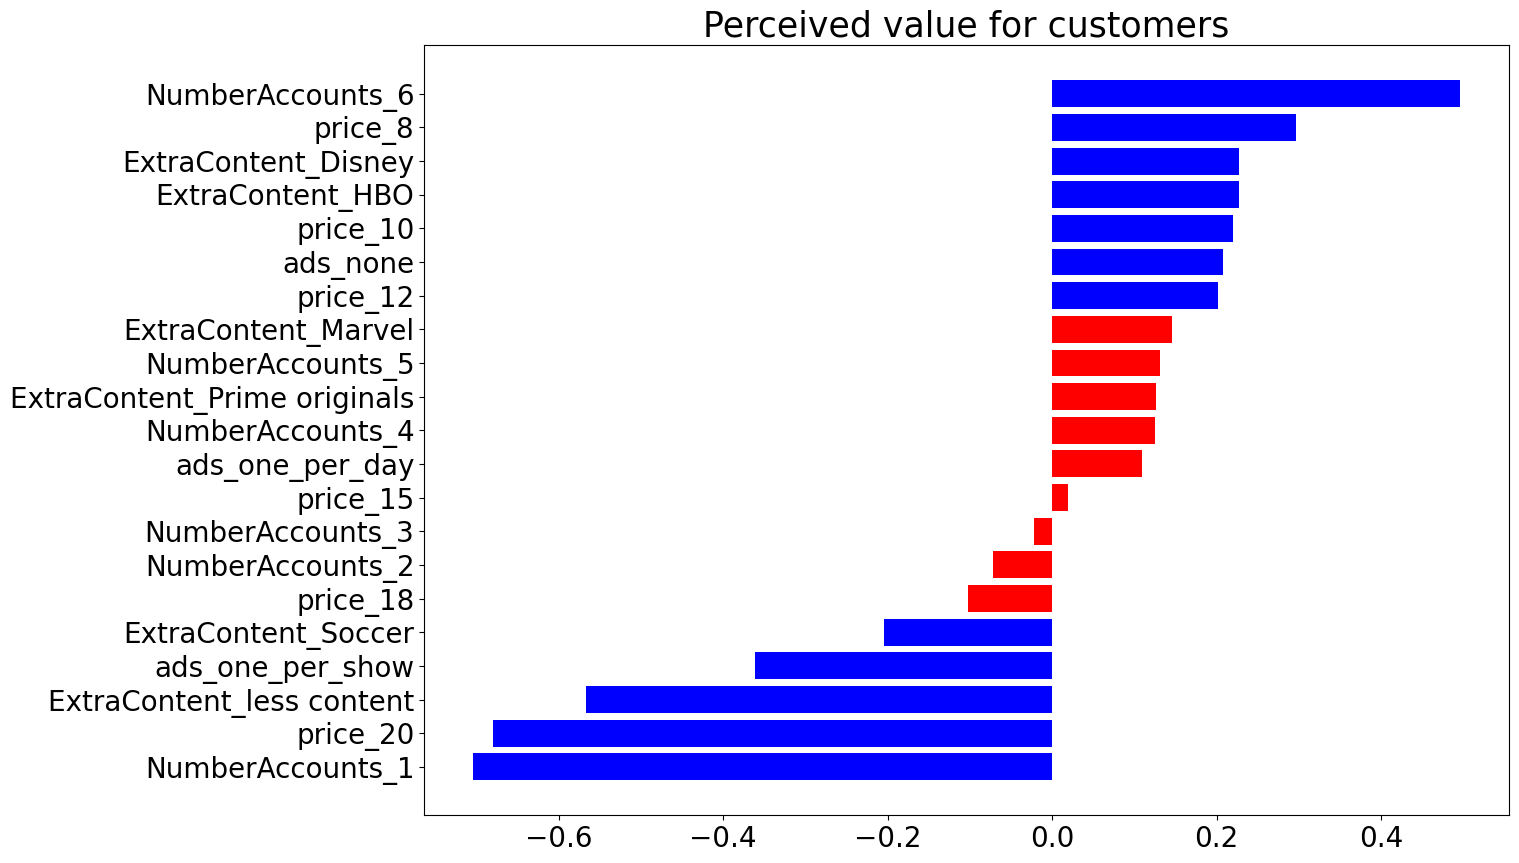

In [ ]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_result.partworth
xbar = np.arange(len(values))
plt.title("Perceived value for customers", fontsize = 25)

#Bar Plot
plt.barh(xbar,
         values,
         color = df_result['color'])

# Customizing the ticks
plt.yticks(xbar,
           labels = df_result['param_name'],
           fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

# Specific groups of Features

In [ ]:
# Isolate the feature group
feature = "price"
attributes = []
coefficients =[]
for i in range(len(df_result)):
  if df_result.iloc[i,0].find(feature) == 0:
    attributes.append(df_result.iloc[i,0])
    coefficients.append(df_result.iloc[i,1])

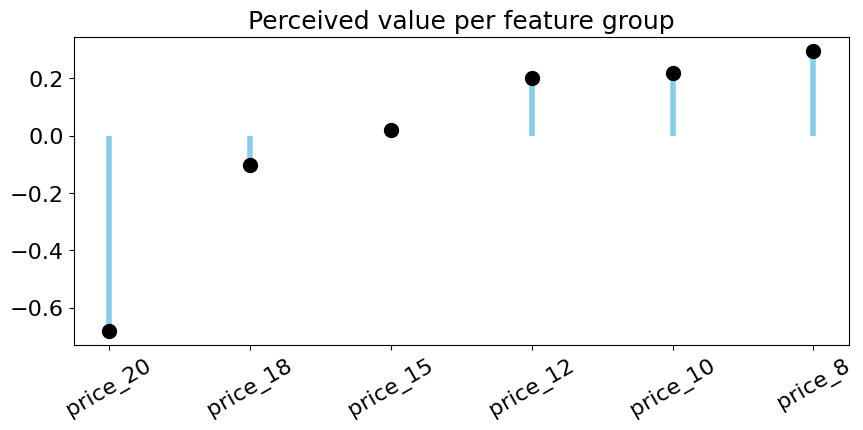

In [ ]:
# Lollipop chart
# Plot the Partworth
f, ax = plt.subplots(figsize = (10,4))
plt.title("Perceived value per feature group", fontsize = 18)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = " ")

# Customize the lollipop
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()

# Feature Importance

In [ ]:
# Coefficients
features_partworth = {}
for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_partworth:
    features_partworth[feature] = list()
  features_partworth[feature].append(coeff)
features_partworth

{'NumberAccounts': [-0.70355777032009,
  -0.07196379758701686,
  -0.021968902691950152,
  0.1251675875494216,
  0.13161143652183438,
  0.4955668938608648],
 'price': [0.29644978631707464,
  0.22023371151399002,
  0.20138336697081743,
  0.019742122377615943,
  -0.1026075648136737,
  -0.6803459750327627],
 'ExtraContent': [0.22741739060922767,
  0.2266389052450029,
  0.14512430909970503,
  0.12678697622002036,
  -0.2046486557911228,
  -0.5664634780497695],
 'ads': [0.2075052292439899, 0.10883922020441415, -0.3614890021153414]}

In [ ]:
# Calculation: maximum of a feature (price_8) minus minimum of a feature (price 20)
importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}
importance_per_feature

{'NumberAccounts': 1.1991246641809548,
 'price': 0.9767957613498374,
 'ExtraContent': 0.7938808686589971,
 'ads': 0.5689942313593312}

In [ ]:
# Computing the sum of importances
total_importances = sum(importance_per_feature.values())
total_importances

3.5387955255491206

In [ ]:
# Relative importance (adds up to 100)
relative_importance_per_feature = {
    k: round(100* v/total_importances,1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.4, 'ads': 16.1}

In [ ]:
# Build DF
df_importances = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns = ['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.4
3,ads,16.1


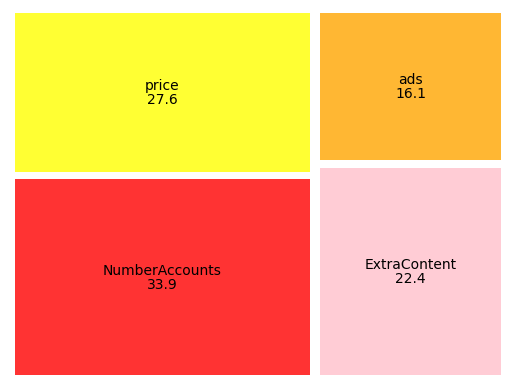

In [ ]:
# Treemap
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ["red", "yellow", "pink", "orange"],
              value = df_importances.relative_importance,
              alpha = 0.8,
              pad = 1)
plt.axis("off")
plt.show()

# Interaction Terms

In [ ]:
# Create Interaction terms
df['content_ads'] = df.ExtraContent + "_" + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [ ]:
# Remove the variables in the interaction term
df_interaction = df.drop(columns = ['ExtraContent', 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [ ]:
# Isolate Y and y
y = df_interaction.selected
X = df_interaction.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,content_ads
0,2,10,HBO_one_per_day
1,6,8,Marvel_one_per_show


In [ ]:
# Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Build the Regression Model
model2 = sm.GLM(y,
               X_dummy,
               family = sm.families.Binomial()).fit()
model2.summary()

# Interaction Terms Results

In [ ]:
# Create a DF with the results
df_result_interaction = pd.DataFrame(
    {'param_name': model2.params.keys(),
     'partworth': model2.params.values,
     'pval': model2.pvalues}).sort_values(
         by = "partworth"
         )
df_result_interaction

,param_name,partworth,pval
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-1.092120,4.580636e-10
NumberAccounts_1,NumberAccounts_1,-0.717649,5.971619e-15
price_20,price_20,-0.695251,4.238951e-14
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.507568,1.567096e-03
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.424302,8.349141e-03
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.354418,2.392313e-02
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,-0.245598,1.126780e-01
content_ads_less content_none,content_ads_less content_none,-0.225583,1.357577e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,-0.155814,3.253273e-01
price_18,price_18,-0.112937,2.020574e-01


In [ ]:
# Isolate the feature group
feature = "content_ads"
attributes = []
coefficients =[]
for i in range(len(df_result_interaction)):
  if df_result_interaction.iloc[i,0].find(feature) == 0:
    if df_result_interaction.iloc[i,0].find("none") == -1:
      attributes.append(df_result_interaction.iloc[i,0])
      coefficients.append(df_result_interaction.iloc[i,1])

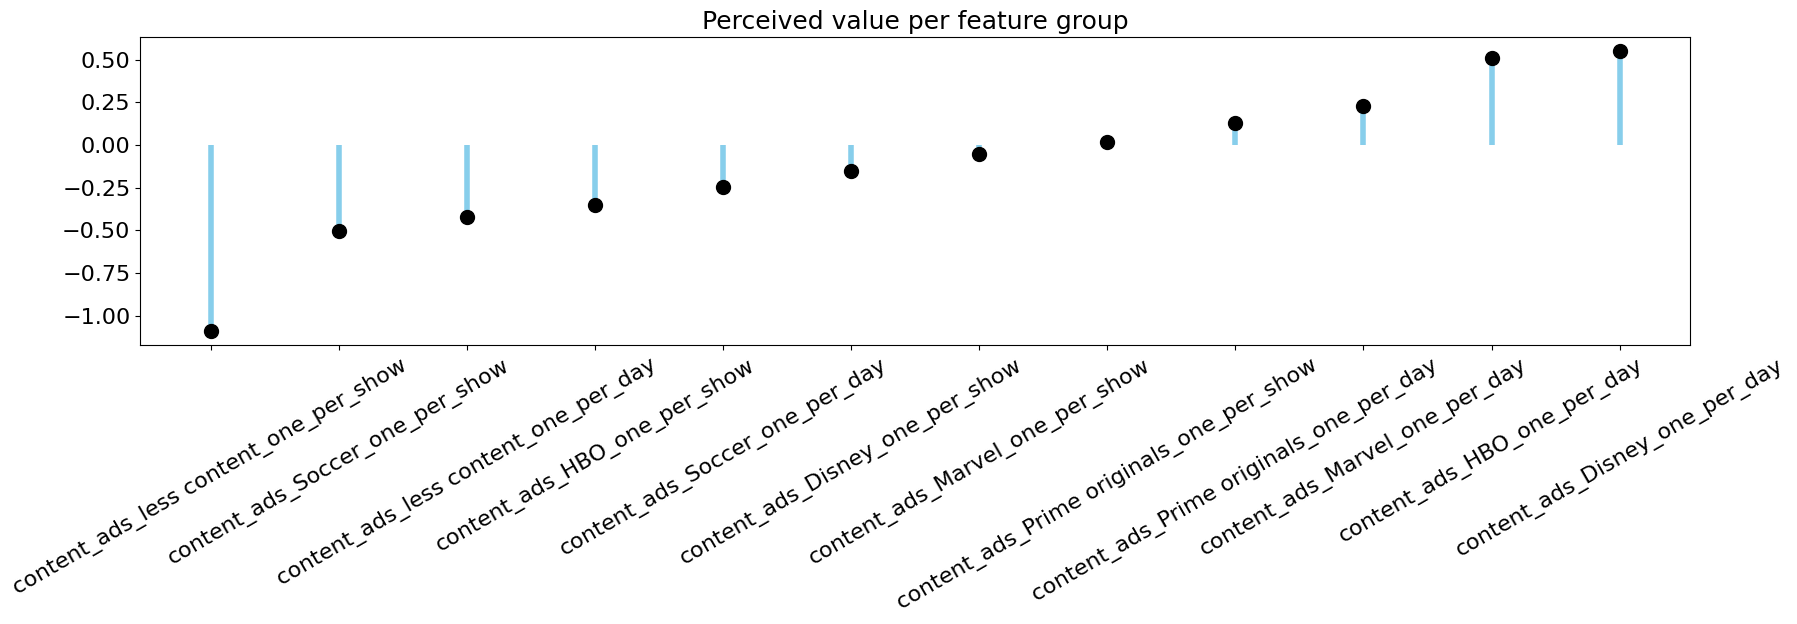

In [ ]:
# Lollipop chart
# Plot the Partworth
f, ax = plt.subplots(figsize = (20,4))
plt.title("Perceived value per feature group", fontsize = 18)

# Lollipop plot
(markers, stemlines, baseline) = plt.stem(attributes,
                                          coefficients,
                                          linefmt = "-",
                                          markerfmt = "o",
                                          basefmt = " ")

# Customize the lollipop
plt.setp(stemlines,
         color = "skyblue",
         linewidth = 4)
plt.setp(markers,
         color = "black",
         markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()